In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "emails.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "balaka18/email-spam-classification-dataset-csv",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head(10))

/tmp/ipython-input-3841876621.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
5   Email 6    4   5    1    4    2   3   45    1    0  ...         0    0   
6   Email 7    5   3    1    3    2   1   37    0    0  ...         0    0   
7   Email 8    0   2    2    3    1   2   21    6    0  ...         0    0   
8   Email 9    2   2    3    0    0   1   18    0    0  ...         0    0   
9  Email 10    4   4   35    0    1   0   49    1   16  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0

In [ ]:
df.describe


<bound method NDFrame.describe of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]>

In [ ]:
df.shape

(5172, 3002)

In [ ]:
df.corr

<bound method DataFrame.corr of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]>

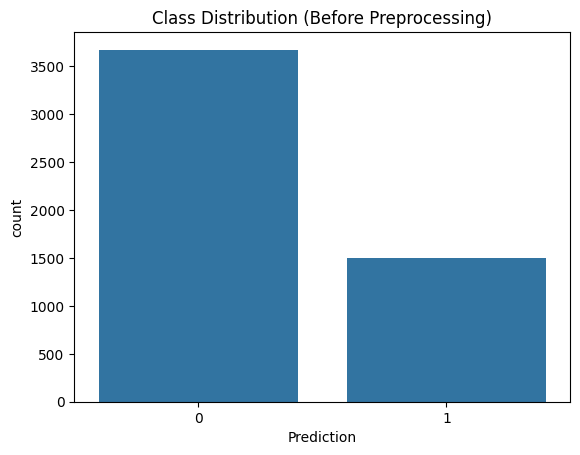

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Prediction", data=df)
plt.title("Class Distribution (Before Preprocessing)")
plt.show()


In [ ]:
df = df.drop(columns=["Email No."])

# Features and target
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)  # try different k values
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("=== KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



=== KNN Results ===
Accuracy: 0.8676328502415459
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       735
           1       0.71      0.91      0.80       300

    accuracy                           0.87      1035
   macro avg       0.84      0.88      0.85      1035
weighted avg       0.89      0.87      0.87      1035



In [ ]:
# ------------------------------
# Support Vector Machine
# ------------------------------
svm = SVC(kernel="linear", random_state=42)  # try 'rbf' also
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("\n=== SVM Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM Results ===
Accuracy: 0.9507246376811594
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       735
           1       0.91      0.92      0.92       300

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# RBF Kernel SVM
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)

svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("=== SVM (RBF Kernel) Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


=== SVM (RBF Kernel) Results ===
Accuracy: 0.9304347826086956
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       735
           1       0.98      0.77      0.87       300

    accuracy                           0.93      1035
   macro avg       0.95      0.88      0.91      1035
weighted avg       0.93      0.93      0.93      1035



In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Results
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Logistic Regression Results ===
Accuracy: 0.966183574879227
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       735
           1       0.92      0.97      0.94       300

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# === Decision Tree ===
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== Decision Tree Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# === Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# === Naive Bayes ===
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("\n=== Naive Bayes Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

=== Decision Tree Results ===
Accuracy: 0.9188144329896907
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1097
           1       0.88      0.84      0.86       455

    accuracy                           0.92      1552
   macro avg       0.91      0.90      0.90      1552
weighted avg       0.92      0.92      0.92      1552


=== Random Forest Results ===
Accuracy: 0.9748711340206185
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.96      0.95      0.96       455

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552


=== Naive Bayes Results ===
Accuracy: 0.9484536082474226
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1097
           1       0.88      0.95      0.92       455

    a